In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_diabetes      # 회귀용 데이터셋

diabetes = load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# 훈련 세트, 테스트 세트 분리
X = diabetes['data']
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### KNeighborRegressor

In [5]:
# KNN regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수: 0.62
테스트 세트 점수: 0.19


심각한 과소적합이 나타난다.

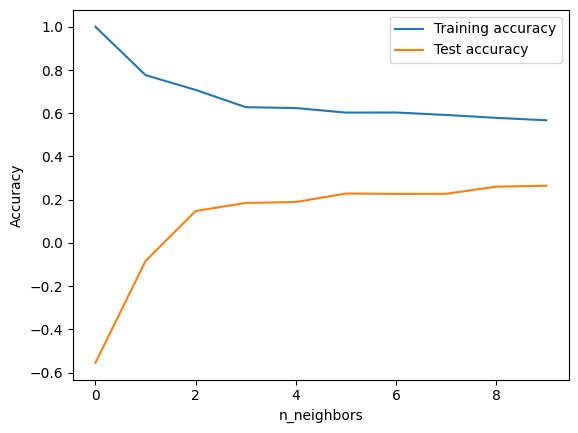

In [6]:
# n_neighbors를 조정

training_accuracy = []
test_accuracy = []
for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(training_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

이웃의 개수를 변경해보았지만 훈련 세트 점수, 테스트 세트 점수 둘 다 여전히 낮다.

### 선형 모델 

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.56
테스트 세트 점수: 0.36


최근접 이웃 회귀와 비교했을 때 훈련 세트의 점수는 약간 낮아졌지만 오히려 일반화는 더 잘 된 모습을 볼 수있다.   
하지만 여전히 특성을 잘 못 살려 심각한 과소 적합을 보인다.

### 결정 트리 회귀


In [8]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 1.00
테스트 세트 점수: -0.24


결정 트리의 경우 훈련 세트의 경우 완벽하지만 테스트 세트에서는 심각하게 낮은 점수를 보인다.   
이는 과대 적합이므로 사전 가지치기를 하거나 앙상블로 해결해보자.

In [9]:
# 사전 가지치기
tree = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(tree.score(X_test, y_test)))

훈련 세트 점수: 0.65
테스트 세트 점수: 0.08


일반화 면에서 조금 더 향상되었지만 여전히 성능은 심각하게 떨어진다.

In [10]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.92
테스트 세트 점수: 0.25


이때까지 봤던 점수 중 그나마 나은 비율이다.   
```n_estimator```를 늘려보자.

In [11]:
forest = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(forest.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(forest.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.24


별 차이가 없다.

### 그레이디언트 부스팅 회귀 트리


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor().fit(X_train, y_train)


print("훈련 세트 점수: {:.2f}".format(grad.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(grad.score(X_test, y_test)))

훈련 세트 점수: 0.88
테스트 세트 점수: 0.22


오히려 ```Random forest```보다 성능이 떨어진다.

In [13]:
# max_depth 조정
grad = GradientBoostingRegressor(max_depth=1).fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(grad.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(grad.score(X_test, y_test)))

print()
# learning_rate 조정
grad = GradientBoostingRegressor(random_state=0, learning_rate=0.01)
grad.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(grad.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(grad.score(X_test, y_test)))

훈련 세트 정확도: 0.631
테스트 세트 정확도: 0.306

훈련 세트 정확도: 0.539
테스트 세트 정확도: 0.288


```max_depth```를 조정했을 때 어느정도 개선되는 모습을 보인다.

### 에이다부스트 모델

In [14]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=100).fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 0.680
테스트 세트 정확도: 0.251


에이다부스트 모델을 사용해도 더 개선되는 모습은 보이지 않는다.

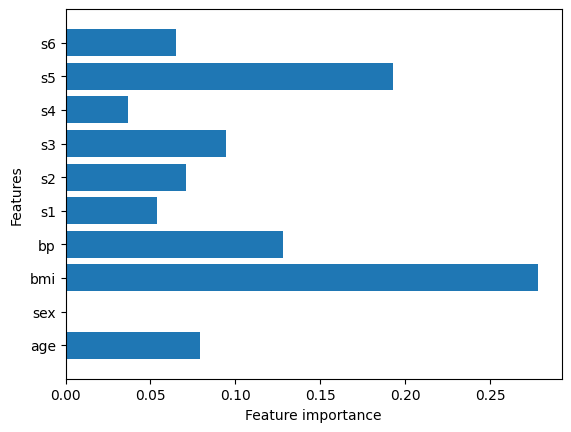

In [15]:
n_features = diabetes.data.shape[1]
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), diabetes.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

### Support Vector Machine


In [16]:
min_on_training = X_train.min(axis=0)   # 훈련 세트에서 특성별 최솟값
range_on_training = (X_train - min_on_training).max(axis=0) # 훈련 세트에서 특성별 범위

# 훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0, 최댓값은 1이 됨.
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
X_test_scaled = (X_test - min_on_training) / range_on_training

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정학도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정학도: 0.097
테스트 세트 정확도: 0.018


서포트 벡터 머신의 경우 형편없는 점수를 보인다.

### 딥러닝


In [22]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=5000, random_state=42).fit(X_train_scaled, y_train)

print("훈련 세트 정학도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정학도: 0.580
테스트 세트 정확도: 0.347


구글링 해봤을 때 대부분의 사람이 훈련, 테스트 세트 점수에서 높지 않은 점수를 보임. (당뇨병의 특성 때문,,?
)

In [19]:
from sklearn.datasets import load_digits        # 다중분류용 데이터셋
digits = load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo